In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("clean_data-v1.csv")

In [ ]:
df.shape

(247613, 23)

In [ ]:
df.columns

Index(['time', 'product_id', 'category_code', 'brand', 'price', 'user_id',
       'day', 'product', 'category', 'afternoon', 'evening', 'morning',
       'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'appliances', 'computers', 'electronics', 'furniture'],
      dtype='object')

In [ ]:
time = list(df["time"].unique())
day = list(df["day"].unique())
cat = list(df["category"].unique())
# brands = list(df["brand"].unique())
features = time + cat

features.append("price")

features

['morning',
 'afternoon',
 'evening',
 'electronics',
 'computers',
 'appliances',
 'furniture',
 'price']

### eda

In [ ]:
df.head()

,time,product_id,category_code,brand,price,user_id,day,product,category,afternoon,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,appliances,computers,electronics,furniture
0,morning,1515966223509088532,electronics.smartphone,samsung,300.90,1.515916e+18,Thursday,smartphone,electronics,0,...,0,0,0,1,0,0,0,0,1,0
1,morning,2273948272861118569,electronics.video.tv,samsung,347.20,1.515916e+18,Saturday,tv,electronics,0,...,0,1,0,0,0,0,0,0,1,0
2,morning,1515966223509117097,computers.notebook,trust,16.64,1.515916e+18,Friday,notebook,computers,0,...,0,0,0,0,0,0,0,1,0,0
3,morning,2273948313948521057,electronics.audio.headphone,huawei,37.01,1.515916e+18,Wednesday,headphone,electronics,0,...,0,0,0,0,0,1,0,0,1,0
4,morning,2273948303068496095,electronics.smartphone,huawei,185.16,1.515916e+18,Thursday,smartphone,electronics,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

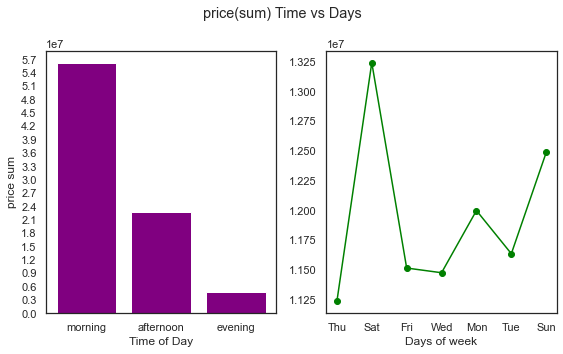

In [ ]:
# visualizing sales sum wrt time
x1_axis = ["morning", "afternoon", "evening"]
morning_price_sum = df[df["time"] == "morning"]["price"].sum()
afternoon_price_sum = df[df["time"] == "afternoon"]["price"].sum()
evening_price_sum = df[df["time"] == "evening"]["price"].sum()
y1_axis = [morning_price_sum, afternoon_price_sum, evening_price_sum]

# wrt to days
x2_ax = [itr for itr in df["day"].unique()]
y2_ax = []
for i in x2_ax:
    y2_ax.append(df[df["day"] == i]["price"].sum())
    pass

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

ax1.yaxis.set_major_locator(MaxNLocator(nbins=20))
ax1.set_ylabel("price sum")
ax1.set_xlabel("Time of Day")
ax1.bar(x1_axis, y1_axis, color="purple")

ax2.plot([i[0:3] for i in x2_ax], y2_ax, color="green", marker="o")
ax2.set_xlabel("Days of week")
fig.suptitle("price(sum) Time vs Days")
plt.tight_layout()
fig.savefig('one.png', dpi=300)

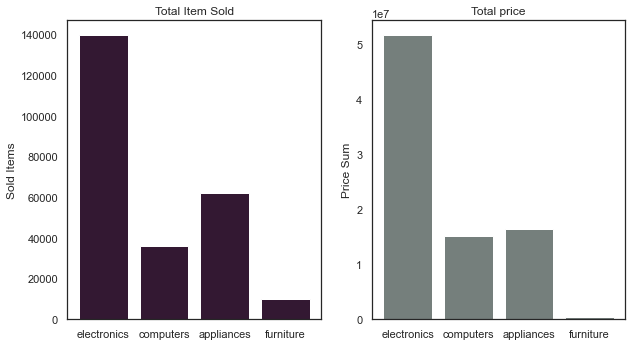

In [ ]:

x1_ax = [i for i in df["category"].unique()]
y1_ax = [df[df["category"] == i]["price"].count() for i in x1_ax]

x2_ax = [i for i in df["category"].unique()]
y2_ax = [df[df["category"] == i]["price"].sum() for i in x2_ax]


# y3_ax = [df[df["day"] == i]["price"].mean() for i in x2_ax]


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5.5))


ax1.bar(x1_ax, y1_ax, color="#331832")
ax1.set_ylabel("Sold Items")
ax1.set_title("Total Item Sold")

ax2.bar(x2_ax, y2_ax, color="#757F7C")
ax2.set_ylabel("Price Sum")
ax2.set_title("Total price")

plt.tight_layout
fig.savefig('one.png', dpi=300)

In [ ]:



# fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))

# ax1.scatter(df["brand"], df["price"])

# ax1.set_xticklabels([i for i in df["brand"].unique()], rotation=90)
# ax1.set_xlabel("products")
# ax1.set_ylabel("price")
# plt.tight_layout

<AxesSubplot:xlabel='Products', ylabel='Price'>

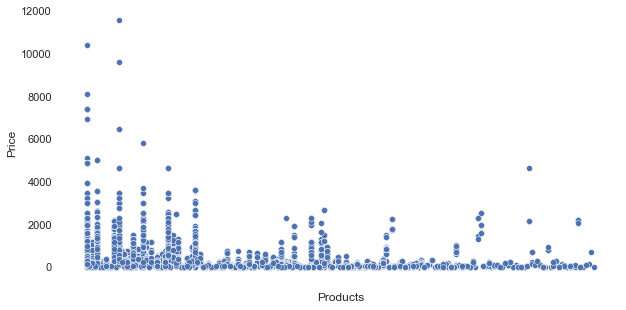

In [ ]:
import seaborn as sns
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(10, 5))

ax.set_xticklabels([], rotation=90)
ax.set_xlabel("Products")
ax.set_ylabel("Price")
sns.despine(f, left=True, bottom=True)
sns.scatterplot(data=df, x="brand", y="price")

### models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(df[features], df['product'], test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average='weighted')
rf_recall = recall_score(y_test, y_pred, average='weighted')
rf_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy:', rf_accuracy)
print("Precision:", rf_precision)
print("rf_recall:", rf_recall)
print("rf_f1:", rf_f1)
rf_cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.9077398380550451
Precision: 0.9102379092758077
rf_recall: 0.9077398380550451
rf_f1: 0.9052319350578695


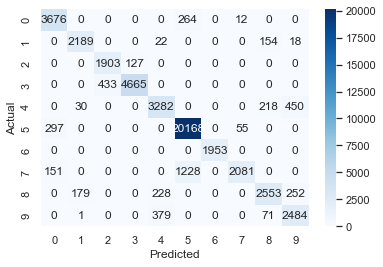

In [ ]:
# Visualize the confusion matrix as a heatmap
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred, average='weighted')
knn_recall = recall_score(y_test, y_pred, average='weighted')
knn_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy:', knn_accuracy)
print("Precision:", knn_precision)
print("knn_recall:", knn_recall)
print("knn_f1:", knn_f1)
knn_cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.8966742725602246
Precision: 0.8969798354817329
knn_recall: 0.8966742725602246
knn_f1: 0.8954228999707602


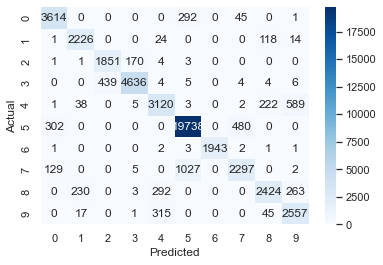

In [ ]:
# Visualize the confusion matrix as a heatmap
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_pred)
gb_precision = precision_score(y_test, y_pred, average='weighted')
gb_recall = recall_score(y_test, y_pred, average='weighted')
gb_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy:', gb_accuracy)
print("Precision:", gb_precision)
print("gb_recall:", gb_recall)
print("gb_f1:", gb_f1)
gb_cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.8865577610403247
Precision: 0.8886998661720722
gb_recall: 0.8865577610403247
gb_f1: 0.8822812381555318


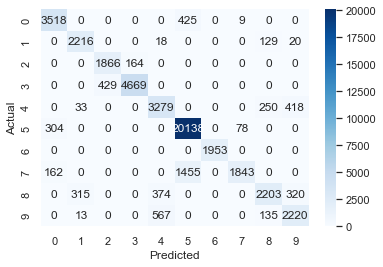

In [ ]:
# Visualize the confusion matrix as a heatmap
sns.heatmap(gb_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, multi_class="multinomial", solver="newton-cg", C=0.7)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lr_accuracy = lr.score(X_test, y_test)
lr_precision = precision_score(y_test, y_pred, average='micro')
lr_recall = recall_score(y_test, y_pred, average='micro')
lr_f1 = f1_score(y_test, y_pred, average='micro')
print('Accuracy:', lr_accuracy)
print("Precision:", lr_precision)
print("gb_recall:", lr_recall)
print("gb_f1:", lr_f1)
lr_cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.7677644730731176
Precision: 0.7677644730731176
gb_recall: 0.7677644730731176
gb_f1: 0.7677644730731177


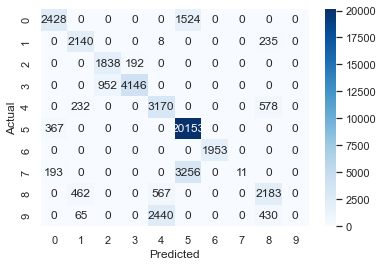

In [ ]:
# Visualize the confusion matrix as a heatmap
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### metrics

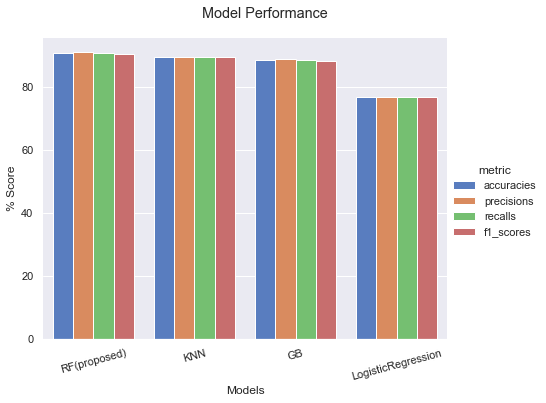

In [ ]:
models = ['RF(proposed)', 'KNN', 'GB', "LogisticRegression"]
accuracies = [rf_accuracy, knn_accuracy, gb_accuracy, lr_accuracy]
precisions = [rf_precision, knn_precision, gb_precision, lr_precision]
recalls = [rf_recall, knn_recall, gb_recall, lr_recall]
f1_scores = [rf_f1, knn_f1, gb_f1, lr_f1]

model_metrics_df = pd.DataFrame({
    'models': models,
    'accuracies': [i*100 for i in accuracies],
    'precisions': [i*100 for i in precisions],
    'recalls': [i*100 for i in recalls],
    'f1_scores': [i*100 for i in f1_scores]
})

model_metrics_df

data_long = pd.melt(model_metrics_df, id_vars=['models'], var_name='metric', value_name='score')

data_long

sns.set_style('darkgrid')
g = sns.catplot(x='models', y='score', hue='metric', data=data_long, kind='bar', palette='muted', height=5, aspect=1.3)
g.despine(left=True)
g.set_ylabels('% Score')
g.set_xlabels('Models')
g.set_xticklabels(rotation=15)
g.fig.suptitle('Model Performance', y=1.05)
plt.show()

            morning  afternoon   evening     price
morning    1.000000  -0.887527 -0.340272 -0.051387
afternoon -0.887527   1.000000 -0.131261  0.033887
evening   -0.340272  -0.131261  1.000000  0.041405
price     -0.051387   0.033887  0.041405  1.000000


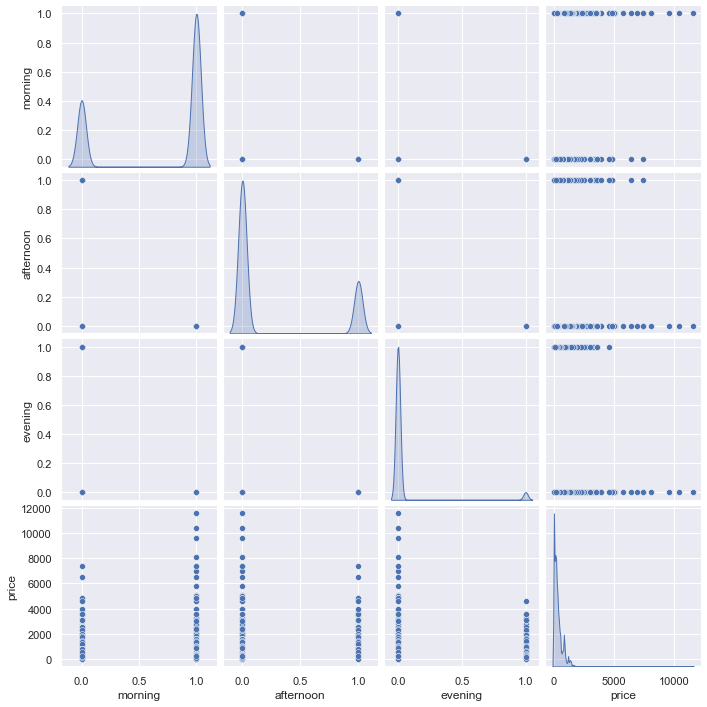

In [ ]:
sub_df = df[["morning","afternoon", "evening",  'price']]
corr_matrix = sub_df.corr()

print(corr_matrix)
# sub_df

import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix as a heatmap
# sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
sns.pairplot(sub_df, diag_kind='kde')
plt.show()

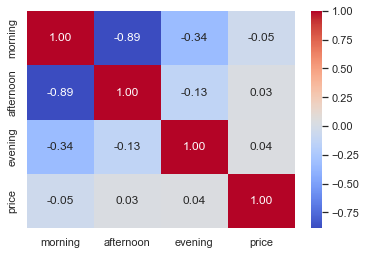

In [ ]:

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()